In [ ]:
!pip install -U kora

In [ ]:
import gc
import cv2
import numpy as np
import statistics
import queue
import matplotlib.pyplot as plt
import time
import itertools
from threading import Thread, current_thread
from IPython.display import HTML
from base64 import b64encode
from google.colab import drive
from kora.drive import upload_public

gc.collect()
drive.mount('/content/drive')
path_to_video = "/content/drive/MyDrive/project images/הזזת השתקפות אצל בן.mp4"
path_to_video_save = "/content/drive/MyDrive/project images/separated video.avi"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download video

In [ ]:
def process_video_separation(video):
  ret = True
  frame_number = 0
  window_size = 30
  separated_video = dict()
  window = list()
  for i in range(window_size):
    ret, frame = video.read()
    if ret:
      window.append(frame / 255.)
  
  process_window_separation(frame_number, separated_video, window)
  frame_number += 1
  
  plt.imshow(separated_video[0])
  plt.show()
  threads = list()

  while (ret and frame_number < 3):
    t = Thread(target=process_window_separation, args=(frame_number, separated_video, window,))
    t.setDaemon(True)
    t.start()
    threads.append(t)
    ret, frame = video.read()
    window = window[1:]
    window.append(frame / 255.)

    # separated_video.append(process_window_separation(window))
    frame_number += 1
    
  for t in threads:
    t.join()

  return list(dict(sorted(separated_video.items())).values())  

In [ ]:
def process_window_separation(frame_number, separated_video, window):
  window = np.array(window)
  h, w, c = window[0].shape
  separated_image = np.zeros(window[0].shape)
  for i, j in itertools.product(range(h), range(w)):
      pixels = window[:,i,j]
      # t = Thread(target=median_RGB, args=(separated_image, i, j, pixels,))
      # t.setDaemon(True)
      # t.start()
      pixel_median = median_RGB(pixels)
      separated_image[i,j] = pixel_median

  print(frame_number)
  separated_video[frame_number] = separated_image

In [ ]:
def median_RGB(pixels):
  r_median = statistics.median(pixels[:,0])
  g_median = statistics.median(pixels[:,1])
  b_median = statistics.median(pixels[:,2])

  # s_image[i,j] = (r_median, g_median, b_median)
  return (r_median, g_median, b_median)

In [ ]:
def save_video(video):
  h, w, _ = video[0].shape
  fourcc = cv2.VideoWriter_fourcc(*'XVID')
  out = cv2.VideoWriter(path_to_video_save, fourcc, 20.0, (w, h))

  for i in range(len(video)):
    out.write((video[i] * 255).astype(np.uint8))

  out.release()
  cv2.destroyAllWindows()
  print("Video made successfully")

0


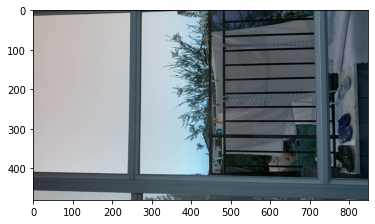

1
2
32.79906444900007


2441

In [ ]:
video = cv2.VideoCapture(path_to_video)
t1 = time.perf_counter()
separated_video = process_video_separation(video)
t2 = time.perf_counter()
print(t2-t1)
gc.collect()
# show_video(separated_video)

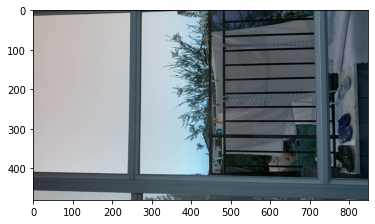

In [ ]:
plt.imshow(separated_video[0])

In [ ]:
print(np.array(separated_video).shape)
save_video(separated_video)

(3, 480, 848, 3)
Video made successfully


In [ ]:
  # url = upload_public(path_to_video)
  # # then display it
  # HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
  # url = upload_public(path_to_video_save)
  # # then display it
  # HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
d = {2:3, 1:89, 4:5, 3:0}
new_d =dict(sorted(d.items()))
print(new_d)
print(list(new_d.values()))

{1: 89, 2: 3, 3: 0, 4: 5}
[89, 3, 0, 5]
